# Julia test notebook

Author: Matthew K. MacLeod

### Tutorial goals

test the following in Julia:
 * basics
 * linear algebra
 * statistics
 * visualization

## Background

Julia has some obvious benifits:
* speed
* dynamic nature (yet strongly typed)
* statistical tools of R, linear algebra of matlab, python feel...
* most of source code written in Julia itself
* coroutines, workers & the actor model
* macros - homoiconicity & metaprogramming

some of my concerns:
* mutability 
* list comprehensions lack conditionals
* lack of tail call optimization
* not yet >= 1.0

We will explore some ways around some of the concerns in this tutorial.
Julia is an interesting language which I hope gets more attention.

In [1]:
# Julia version used in this tutorial
Base.banner()

               _
   _       _ _(_)_     |  A fresh approach to technical computing
  (_)     | (_) (_)    |  Documentation: http://docs.julialang.org
   _ _   _| |_  __ _   |  Type "?help" for help.
  | | | | | | |/ _` |  |
  | | |_| | | | (_| |  |  Version 0.5.0-dev+876 (2015-10-20 20:44 UTC)
 _/ |\__'_|_|_|\__'_|  |  Commit 3e7206e (82 days old master)
|__/                   |  x86_64-redhat-linux



## Introduction to Julia

we'll go through some of the basic collection types:

* array
* tuple
* dictionary 
* set
* others

#### Array

these are mutable homogenous collections

In [2]:
collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [3]:
# note type difference from that of collect, as can cause problems
(1:10)

10-element UnitRange{Int64}:
 1,2,3,4,5,6,7,8,9,10

In [4]:
div(10,3)

3

In [5]:
10 % 3

1

In [6]:
a = collect(1:10)
# showcase enumerate
for (i,value) in enumerate(a)
    println("element $i squared is $(value^2)")
end

element 1 squared is 1


#### Tuples

some notes:
* tuples are heterogeneous immutable containers
* strings are also immutable.

In [7]:
function doubler(a,b)
    return (a+a, b+b)
end
# unpack results into x and y
t = x, y = doubler(1.0,2)
println(t)
println(x)
println(y)

element 2 squared is 4
element 3 squared is 9
element 4 squared is 16
element 5 squared is 25
element 6 squared is 36
element 7 squared is 49
element 8 squared is 64
element 9 squared is 81
element 10 squared is 100
(2.0,4)
2.0

#### Sets

In [8]:
text = "Thy self thy foe to thy sweet self too cruel"
text_array = split(lowercase(text), ' ')
ts = Set(text_array)
unique_text_array = [i for i in ts]
unique_text = join(unique_text_array, " ")

"cruel foe self thy to sweet too"


4


In [9]:
another_line = "Within thine own bud buriest thy content"
text_array_2 = split(lowercase(another_line), ' ')
ts_2 = Set(text_array_2)
println("Union: ", union(ts,ts_2),"\n")
println("Intersection: ", intersect(ts,ts_2), "\n")
println("Set difference: ", setdiff(ts,ts_2), "\n")

Union: Set

#### Dictionary

In [10]:
counts = Dict()
for t in text_array
    t in keys(counts) ? counts[t] += 1 : counts[t] = 1
end
   
for (k,v) in counts
    println("key: ",k,"\t value: ",v)
end

#### Regex

In [11]:
# lets match simple emoticons, smiles or frowns
text = "so happy you made it :)"
emoji_pattern = r"(:[)(])+"
m = match(emoji_pattern,text)
println(m.match)

(SubString{ASCIIString}["own","buriest","foe","content","self","too","cruel","bud","thy","to","sweet","within","thine"])

Intersection: Set(SubString{ASCIIString}["thy"])

Set difference: Set(SubString{ASCIIString}["cruel","foe","self","to","sweet","too"])

key: cruel	 value: 1
key: foe	 value: 1
key: self	 value: 2
key: thy	 value: 3
key: to	 value: 1
key: sweet	 value: 1
key: too	 value: 1
:)

#### Priority Queues

these can be handy

https://en.wikipedia.org/wiki/Priority_queue


#### Data Frames

In [12]:
using DataFrames

In [13]:
max_row = 10
df = DataFrame()
df[:x] = 1:max_row
df[:square] = [i^2 for i in 1:max_row]
df[:cube] = [i^3 for i in 1:max_row]
df[:exponential] = [exp(i) for i in 1:max_row]
df[:log] = [log(i) for i in 1:max_row]
df[:less_than_2] = [i < 2 for i in 1:max_row]
show(df)


10x6 DataFrames.DataFrame


In [14]:
describe(df[1])

| Row | x  | square | cube | exponential | log      | less_than_2 |
|-----|----|--------|------|-------------|----------|-------------|
| 1   | 1  | 1      | 1    | 2.71828     | 0.0      | true        |
| 2   | 2  | 4      | 8    | 7.38906     | 0.693147 | false       |
| 3   | 3  | 9      | 27   | 20.0855     | 1.09861  | false       |
| 4   | 4  | 16     | 64   | 54.5982     | 1.38629  | false       |
| 5   | 5  | 25     | 125  | 148.413     | 1.60944  | false       |
| 6   | 6  | 36     | 216  | 403.429     | 1.79176  | false       |
| 7   | 7  | 49     | 343  | 1096.63     | 1.94591  | false       |
| 8   | 8  | 64     | 512  | 2980.96     | 2.07944  | false       |
| 9   | 9  | 81     | 729  | 8103.08     | 2.19722  | false       |
| 10  | 10 | 100    | 1000 | 22026.5     | 2.30259  | false       |Summary Stats:


In [15]:
show(df[:x])

In [16]:
head(df)

,x,square,cube,exponential,log,less_than_2
1,1,1,1,2.718281828459045,0.0,true
2,2,4,8,7.38905609893065,0.6931471805599453,false
3,3,9,27,20.085536923187668,1.0986122886681096,false
4,4,16,64,54.598150033144236,1.3862943611198906,false
5,5,25,125,148.4131591025766,1.6094379124341003,false
6,6,36,216,403.4287934927351,1.791759469228055,false


Mean:         5.500000
Minimum:      1.000000
1st Quartile: 3.250000
Median:       5.500000
3rd Quartile: 7.750000
Maximum:      10.000000
[1,2,3,4,5,6,7,8,9,10]

In [17]:
println(mean(df[:x]))
println(std(df[:x]))
println(var(df[:x]))
println(sqrt(var(df[:x])))

5.5
3.

In [18]:
mean(df[:x][1:5])

3.0

In [19]:
cor(df[:x],df[:square])

0.9745586289152093

0276503540974917
9.166666666666666
3.0276503540974917


In [20]:
cov(df[:x],df[:square])

100.83333333333333

In [21]:
# conditional subset
df[df[:x] .== 5, :]

,x,square,cube,exponential,log,less_than_2
1,5,25,125,148.4131591025766,1.6094379124341003,false


In [22]:
df[df[:x] .<= 5, :]

,x,square,cube,exponential,log,less_than_2
1,1,1,1,2.718281828459045,0.0,true
2,2,4,8,7.38905609893065,0.6931471805599453,false
3,3,9,27,20.085536923187668,1.0986122886681096,false
4,4,16,64,54.598150033144236,1.3862943611198906,false
5,5,25,125,148.4131591025766,1.6094379124341003,false


#### Custom Types

to create a custom type, use 
    
    type
or 
    
    immutable

In [23]:
immutable Flip
    v::Int8
end

In [24]:
a = Flip(rand([0,1]))
a.v

1

In [25]:
a

Flip(1)

In [26]:
b = Flip(rand([0,1]))
b.v

1

In [27]:
b

Flip(1)

#### Macros

Homoiconic languages allow one to easily extend the programming language.
Let's add some functionality to make Julia a bit more fun.

* **until** (while !condition)
* **unless** (if !condition)

In [95]:
# add until macro
macro until(condition, block)
    quote
        while !($condition)
            $(esc(block))
        end
    end
end

In [96]:
i = 1
@until i == 5 begin
    println("i = $i")
    i +=1
end

i = 1
i = 2
i = 3
i = 4


In [97]:
# until is an especially nice way to present optimization, eg
converged, i = false, 1
@until converged begin
    if i == 6
        converged = true
        println("converged")
    else
        println("not converged")
        i += 1
    end
end

not converged
not converged
not converged
not converged
not converged
converged


In [98]:
# add unless macro
macro unless(condition, block)
    quote
        if !($condition)
            $(esc(block))
        end
    end
end

In [99]:
@unless false begin
    println("this is true")
end

this is true


In [100]:
@unless false (println("true again"))

true again


### functional 

In [34]:
# list comps
squares = [i^2 for i in collect(1:10)]  # julia indices start with 1

10-element Array{Int64,1}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [35]:
# could also do 
cubes = [i^3 for i in 1:10]

10-element Array{Int64,1}:
    1
    8
   27
   64
  125
  216
  343
  512
  729
 1000

In [101]:
fib(n) = n < 2 ? n : fib(n - 1) + fib(n - 2)
fib(40)

102334155

### Julia has some very basic pipes

In [37]:
25 |> sqrt

5.0

### filter

while list comprehensions dont have a filter, it's not really a problem as we can
get the same desired functionality with map and filter

In [38]:
array = collect(1:10)

10-element Array{Int64,1}:
  1
  2
  3
  4
  5
  6
  7
  8
  9
 10

In [39]:
# keep even squares
filter(x -> x % 2 == 0, map(x -> x * x, array))

5-element Array{Int64,1}:
   4
  16
  36
  64
 100

In [40]:
function is_prime(x)
    return all([x%j != 0 for j in 2:(x-1)])
end

# return primes between x and y
function primes(x,y)
    return filter(is_prime, [i for i in x:(y-1)]) 
end

primes (generic function with 1 method)

In [41]:
primes(200,300)

16-element Array{Int64,1}:
 211
 223
 227
 229
 233
 239
 241
 251
 257
 263
 269
 271
 277
 281
 283
 293

### reduce

In [42]:
reduce(+, array)

55

In [43]:
# sum squares
reduce(+, map(x -> x * x, array))

385

In [44]:
# sum even squares
reduce(+, filter(x -> x % 2 == 0, map(x -> x*x, array)))

220

In [45]:
function l1_norm(a)
    return reduce(+, map(x-> abs(x),a))
end

l1_norm (generic function with 1 method)

In [46]:
function l2_norm(a)
    return sqrt(reduce(+, map(x -> x^2,a)))
end

l2_norm (generic function with 1 method)

In [47]:
function ln_norm(a,power)
    return (reduce(+, map(x -> abs(x)^power,a)))^(1/power)
end

ln_norm (generic function with 1 method)

In [48]:
println(l1_norm(array))
println(l2_norm(array))
println(ln_norm(array,2))
println(ln_norm(array,3))
println(ln_norm(array,1/2))
println(ln_norm(array,1))

55


In [49]:
# to make sure absolute value function is working
b = collect(1:10)
b[2] = -2
b

10-element Array{Int64,1}:
  1
 -2
  3
  4
  5
  6
  7
  8
  9
 10

In [50]:
# should return double nickels
println(ln_norm(b,1))

### Coroutines in Julia 

In [51]:
function fibber(n)
    a, b = (0, 1)
    for i in 1:n
        produce(b)
        a, b = (b, a + b)
    end
end

fibber (generic function with 1 method)

In [52]:
fibs = @task fibber(6)

Task (runnable) @0x00007f907538b530

In [53]:
for i in fibs
   print(i," , ")
end


19.621416870348583
19.621416870348583
14.462447418811122
504.82352465265495
55.0
55.0
1

#### IO 

In [102]:
outfile = open("test.txt", "w")

IOStream(<file test.txt>)

In [103]:
for i in 1:10
    println(outfile, "i is $i")
end
close(outfile)

In [110]:
# shell out
run(`cat test.txt`)

i is 1
i is 2
i is 3
i is 4
i is 5
i is 6
i is 7
i is 8
i is 9
i is 10


In [57]:
infile = open("test.txt", "r")

IOStream(<file test.txt>)

 , 1 , 2 , 3 , 5 , 8 , 

In [58]:
lines = readlines(infile)

10-element Array{ByteString,1}:
 "i is 1\n" 
 "i is 2\n" 
 "i is 3\n" 
 "i is 4\n" 
 "i is 5\n" 
 "i is 6\n" 
 "i is 7\n" 
 "i is 8\n" 
 "i is 9\n" 
 "i is 10\n"

In [59]:
map(split,lines)

10-element Array{Array{SubString{ASCIIString},1},1}:
 SubString{ASCIIString}["i","is","1"] 
 SubString{ASCIIString}["i","is","2"] 
 SubString{ASCIIString}["i","is","3"] 
 SubString{ASCIIString}["i","is","4"] 
 SubString{ASCIIString}["i","is","5"] 
 SubString{ASCIIString}["i","is","6"] 
 SubString{ASCIIString}["i","is","7"] 
 SubString{ASCIIString}["i","is","8"] 
 SubString{ASCIIString}["i","is","9"] 
 SubString{ASCIIString}["i","is","10"]

In [60]:
[float(line[3]) for line in map(split, lines)]

10-element Array{Any,1}:
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

## Linear Algebra

In [61]:
A = [1 2; 3 4]

2x2 Array{Int64,2}:
 1  2
 3  4

In [62]:
eig(A)

([-0.3722813232690143,5.372281323269014],
2x2 Array{Float64,2}:
 -0.824565  -0.415974
  0.565767  -0.909377)

In [63]:
eigvals(A)

2-element Array{Float64,1}:
 -0.372281
  5.37228 

In [64]:
inv(A)

2x2 Array{Float64,2}:
 -2.0   1.0
  1.5  -0.5

In [65]:
det(A)

-2.0

In [66]:
norm(A)

5.464985704219043

#### Solve linear equation: 

#### Ax=b

In [67]:
A = rand(5,5)
b = rand(5,1)
print("A:",A)
print("b:",b)

A:[

In [68]:
x = A \ b

5x1 Array{Float64,2}:
  1.00539 
  0.575987
  1.25771 
 -0.14094 
 -0.943458

0.4181675879000981 0.061824789789497236 0.7438469636266412 0.7559147415202296 0.5983934183850528
 0.7110121112803984 0.3661123671820552 0.566426290266365 0.8766413255512278 0.6271423083369727
 0.6939434129438078 0.13184675592107986 0.41919872008217474 0.16443135341456094 0.8540153880101993
 0.0644970204092854 0.8570180232849982 0.8661616909714966 0.5965682656216471 0.6625336995076496
 0.10263351080238658 0.6074034908213584 0.6286221586961891 0.8294740450341882 0.7877980695849756]b:[0.7204752599921667
 0.9228828039061467
 0.47195277619225706
 0.9386996885596397
 0.38350496833847125]

In [69]:
A = [0 1
1 1
2 1
3 1
4 1
5 1
6.0 1
7 1
8 1]

9x2 Array{Float64,2}:
 0.0  1.0
 1.0  1.0
 2.0  1.0
 3.0  1.0
 4.0  1.0
 5.0  1.0
 6.0  1.0
 7.0  1.0
 8.0  1.0

In [70]:
y = [19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24]

9-element Array{Float64,1}:
 19.0
 20.0
 20.5
 21.5
 22.0
 23.0
 23.0
 25.5
 24.0

In [71]:
A \ y

2-element Array{Float64,1}:
  0.716667
 19.1889  

## Distance examples

* examine various distance metrics
   * euclidean
   * mahalanobis

In [72]:
# an example of a function
function euclidean_distance(a,b)
    differences = a-b
    return sqrt(reduce(+, map(x -> x*x, differences)))
end


euclidean_distance (generic function with 1 method)

In [73]:
"""
input: one array consisting of point_1 and point_2
output: point_1, point_2
"""
function split_points(points)
    half = round(Int,length(points)/2)
    point_a = points[1:half]
    point_b = points[half+1:length(points)]
    return point_a, point_b
end

split_points (generic function with 1 method)

In [74]:
point_1, point_2 = split_points([1.2, 2.2, 3.8, 1.0, 2.0, 8.8])
euclidean_distance(point_1, point_2)

5.007993610219566

## Statistics

In [75]:
# uniform random numbers
rand(10)

10-element Array{Float64,1}:
 0.0993688 
 0.0770507 
 0.47399   
 0.456245  
 0.138516  
 0.34149   
 0.522371  
 0.00347909
 0.457082  
 0.0542757 

In [76]:
# random normal numbers
randn(10)

10-element Array{Float64,1}:
  0.361068
 -0.45819 
  1.32215 
  0.178593
  0.536938
  0.199618
 -0.432773
 -0.631547
  1.1608  
 -1.04465 

In [77]:
linspace(1.0,2.0,10)

10-element LinSpace{Float64}:
 1.0,1.11111,1.22222,1.33333,1.44444,1.55556,1.66667,1.77778,1.88889,2.0

In [78]:
using Distributions

In [79]:
srand(100) # set seed

MersenneTwister(Base.dSFMT.DSFMT_state(Int32[-2036630343,1072818225,1299231502,1073154435,1563612565,1073206618,176198161,1073683625,381415896,1073699088  …  163992627,1073241259,385818456,1072878963,399273729,595433664,390891112,1704156657,382,0]),[1.90502,1.35491,1.41817,1.71101,1.69394,1.0645,1.10263,1.06182,1.36611,1.13185  …  1.74952,1.79706,1.21984,1.16753,1.81842,1.91462,1.20514,1.24033,1.34073,1.43158],382,UInt32[0x00000064])

In [80]:
# create an array of 1,000 Normally distributed numbers
# with an average of 10 and std of 3
n = rand(Normal(100,3),1_000)
println(mean(n))
println(var(n))
println(sqrt(var(n)))

99.

In [81]:
median(n)

99.81338795569694

89441515856763
9.502292074157884
3.082578802586867


In [82]:
# get median and 95th percentile
quantile(n,[0.5,0.95])

2-element Array{Float64,1}:
  99.8134
 104.915 

In [83]:
skewness(n)

0.014354422343578968

In [84]:
kurtosis(n)

-0.10401909071605031

## Visualization

In [94]:
using Gadfly, RDatasets, DataFrames

In [86]:
set_default_plot_size(20cm,10cm);

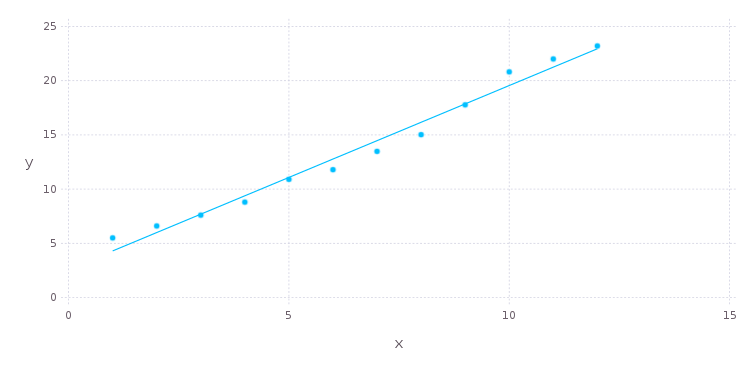

In [87]:
# linear regression 
x = [1.0:12.0;]
y = [5.5, 6.6, 7.6, 8.8, 10.9, 11.79, 13.48, 15.02, 17.77, 20.81, 22.0, 23.2]
a, b = linreg(x, y)  # Linear regression
plot(layer(x=x,y=[a+b*i for i in x], Geom.line),layer(x=x,y=y, Geom.point))

In [88]:
mlm = dataset("mlmRev","Gcsemv")
df = mlm[complete_cases(mlm), :]
println("done")

done


In [89]:
names(df)

5-element Array{Symbol,1}:
 :School 
 :Student
 :Gender 
 :Written
 :Course 

In [90]:
describe(df)

School
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  73

Student
Length  1905


LoadError: LoadError: ArgumentError: quantiles are undefined in presence of NaNs
while loading In[90], in expression starting on line 1

Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  649

Gender
Length  1905
Type    Pooled ASCIIString
NAs     0
NA%     0.0%
Unique  2

Written


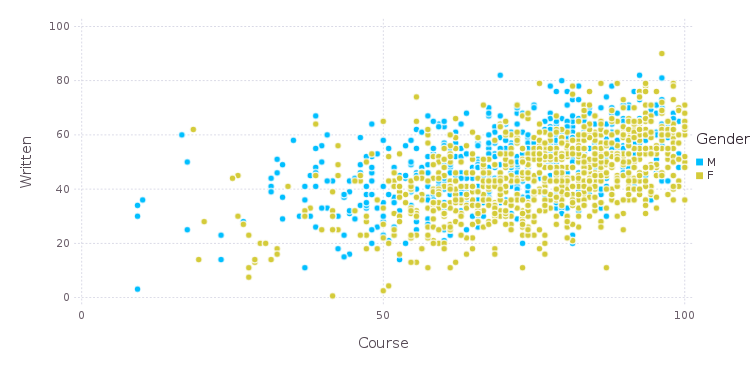

In [91]:
plot(df, x="Course",y="Written", color="Gender")

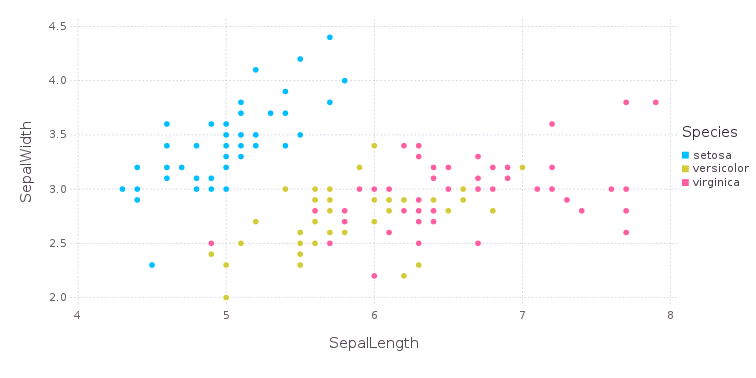

In [92]:
plot(dataset("datasets", "iris"), x="SepalLength", y="SepalWidth",color="Species", Geom.point)

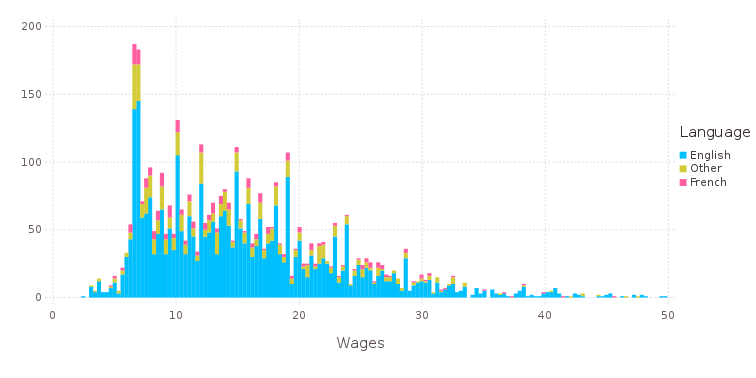

In [93]:
plot(dataset("car", "SLID"), x="Wages", color="Language", Geom.histogram)

note see file mkm_notebooks/license.txt for license of this notebook.